# Projeto-4

### Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime


### Leitura do arquivo e tratamento dos dados

In [5]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=True)
df_gas.info()
#teste

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [6]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=['DATA INICIAL', 'DATA FINAL'])
df_gas['ANO'] = df_gas['DATA FINAL'].dt.year
df_gas['MÊS'] = df_gas['DATA FINAL'].dt.month
df_gas.head()

DATA INICIAL DATA FINAL        REGIÃO              ESTADO           PRODUTO  \
0   2004-05-09 2004-05-15  CENTRO OESTE    DISTRITO FEDERAL  ETANOL HIDRATADO   
1   2004-05-09 2004-05-15  CENTRO OESTE               GOIAS  ETANOL HIDRATADO   
2   2004-05-09 2004-05-15  CENTRO OESTE         MATO GROSSO  ETANOL HIDRATADO   
3   2004-05-09 2004-05-15  CENTRO OESTE  MATO GROSSO DO SUL  ETANOL HIDRATADO   
4   2004-05-09 2004-05-15      NORDESTE             ALAGOAS  ETANOL HIDRATADO   

   NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
0                           127              R$/l                1.288   
1                           387              R$/l                1.162   
2                           192              R$/l                1.389   
3                           162              R$/l                1.262   
4                           103              R$/l                1.181   

   DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
0                  0.016                  1.19                 1.350   
1                  0.114                  0.89                 1.449   
2                  0.097                  1.18                 1.760   
3                  0.070                  1.09                 1.509   
4                  0.078                  1.05                 1.400   

  MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA PREÇO MÉDIO DISTRIBUIÇÃO  \
0                0.463                     0.012                    0.825   
1                0.399                     0.098                    0.763   
2                0.419                     0.070                     0.97   
3                0.432                     0.055                     0.83   
4                 0.24                     0.066                    0.941   

  DESVIO PADRÃO DISTRIBUIÇÃO PREÇO MÍNIMO DISTRIBUIÇÃO  \
0                       0.11                    0.4201   
1                      0.088                    0.5013   
2                      0.095                    0.5614   
3                      0.119                    0.5991   
4                      0.077                    0.7441   

  PREÇO MÁXIMO DISTRIBUIÇÃO COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
0                    0.9666                         0.133  2004    5  
1                      1.05                         0.115  2004    5  
2                     1.161                         0.098  2004    5  
3                   1.22242                         0.143  2004    5  
4                    1.0317                         0.082  2004    5

In [7]:
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL' if (x =='OLEO DIESEL') else x)
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL S10' if (x =='OLEO DIESEL S10') else x)


In [8]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   120823 non-null  datetime64[ns]
 1   DATA FINAL                     120823 non-null  datetime64[ns]
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

### Objetivos!!

- Plotar gráfico com a taxa de aumento de cada combustivel em todo período.
- Plotar um gráfico com o crescimento da média do PREÇO MÉDIO REVENDA ano a ano por Região.
- Ver qual o estado que mais/menos aumentou o valor médio do PREÇO MÉDIO REVENDA ano a ano por Região e plotar um gráfico comparando os dois.
- Comparar a média do PREÇO MÉDIO REVENDA com o PREÇO MÉDIO DISTRIBUIÇÃO desses dois estados.
- Plotar um gráfico com a média da quantidade de postos por estado em 2004 x a quantidade média de postos por estado em 2021.
- Ver a correlação da quantidade de postos disponiveis avaliados com PREÇO MÉDIO REVENDA entre todos os estados.
- Mapa de calor com valor médio de cada estado.
- Mapa de calor com quantidade de postos por estado.

- Observações:
- Há valores com -9999, devemos substituir por NaN?
- Gasolina Aditivada só temos valores entre 20-21, base de dados muito pequena em relação aos outros!

### - Plotar gráfico com a taxa de aumento de cada combustivel em todo período.

In [9]:
df_gas['REGIÃO'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

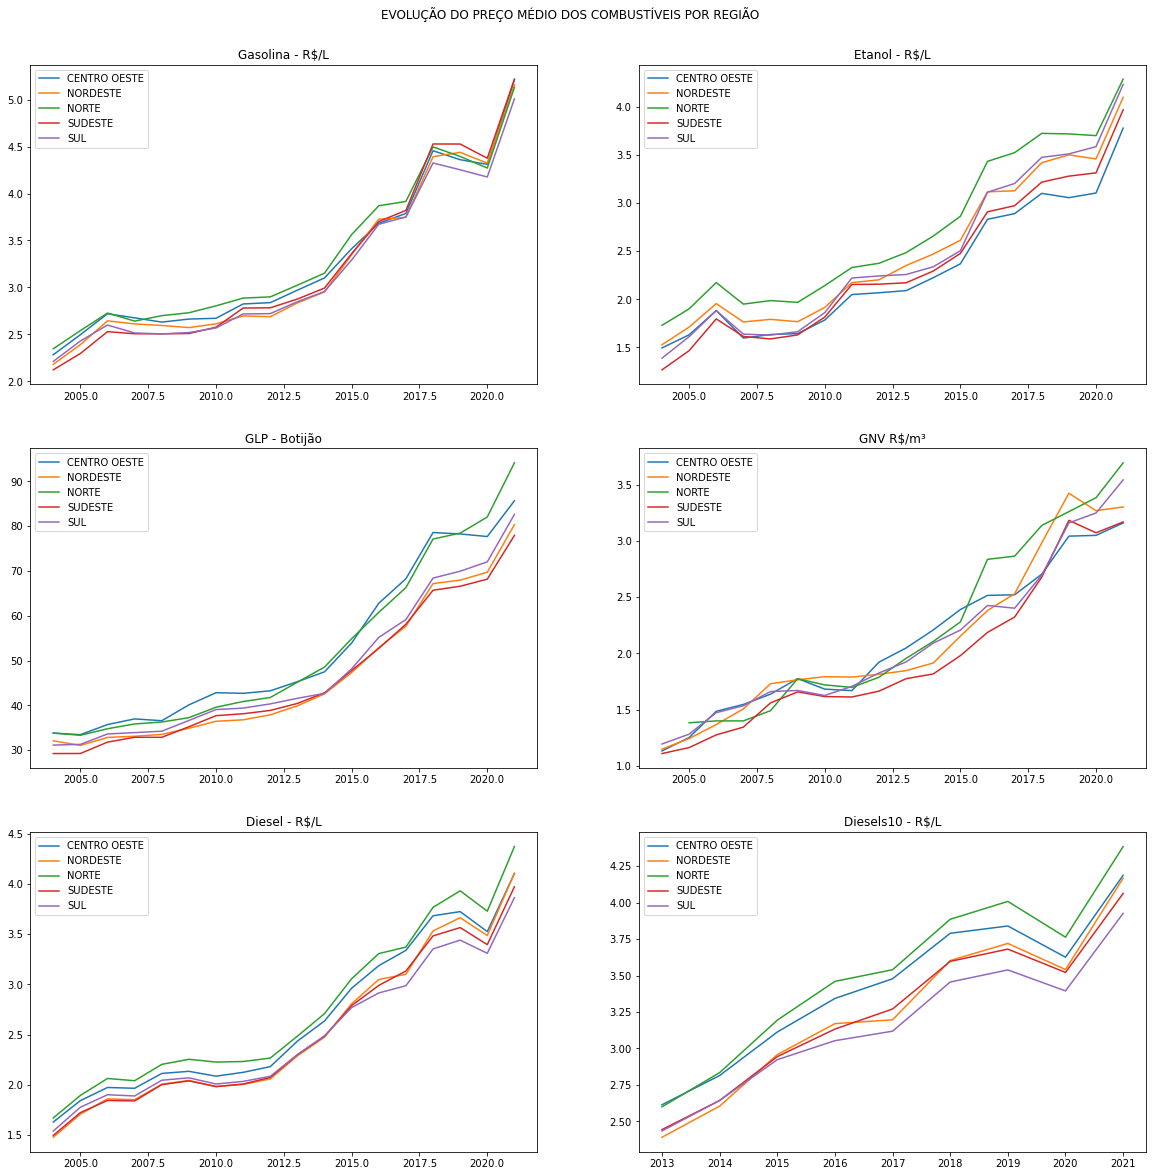

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
fig.suptitle('EVOLUÇÃO DO PREÇO MÉDIO DOS COMBUSTÍVEIS POR REGIÃO', fontsize=12, y=0.92)

df_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_etanol = df_gas[df_gas['PRODUTO']=='ETANOL HIDRATADO'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_glp = df_gas[df_gas['PRODUTO']=='GLP'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_gnv = df_gas[df_gas['PRODUTO']=='GNV'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesel = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesels10 = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL S10'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')

axs[0,0].plot(df_gasolina)
axs[0,1].plot(df_etanol)
axs[1,0].plot(df_glp)
axs[1,1].plot(df_gnv)
axs[2,0].plot(df_diesel)
axs[2,1].plot(df_diesels10)

axs[0,0].set_title('Gasolina - R$/L')
axs[0,1].set_title('Etanol - R$/L')
axs[1,0].set_title('GLP - Botijão')
axs[1,1].set_title('GNV R$/m³')
axs[2,0].set_title('Diesel - R$/L')
axs[2,1].set_title('Diesels10 - R$/L')

axs[0,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[0,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[1,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[1,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[2,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[2,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left');

- Comentários:

- O Norte tem majoritariamente o maior preço dos diesels(comum e 10s) e do etanol e também do GNV a partir de 2015, do GLP a partir de 2018 e da gasolina entre 2008 e 2017. Com certeza é pior região em relação a preço.
- 

In [11]:
aumento_produto = df_gas.pivot_table(index='ANO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
aumento_bruto_produto = df_gas.loc[df_gas["ANO"]==2021].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean() - df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean()

aumento_percentual_produto = ((df_gas.loc[df_gas["ANO"]==2021].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean() - df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean())/df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean())*100
display(aumento_bruto_produto)
display(aumento_percentual_produto )

PRODUTO
ETANOL HIDRATADO      169.016250
GASOLINA ADITIVADA           NaN
GASOLINA COMUM        130.504060
GLP                   162.139590
GNV                   189.557554
ÓLEO DIESEL           164.856207
ÓLEO DIESEL S10              NaN
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [12]:
aumento_bruto_produto=aumento_bruto_produto.to_frame()
aumento_percentual_produto=aumento_percentual_produto.to_frame()

In [13]:
aumento_bruto_produto['PREÇO MÉDIO REVENDA'] = aumento_bruto_produto['PREÇO MÉDIO REVENDA'].fillna(0)
aumento_bruto_produto.reset_index(inplace=True)
aumento_bruto_produto

PRODUTO  PREÇO MÉDIO REVENDA
0    ETANOL HIDRATADO             2.572169
1  GASOLINA ADITIVADA             0.000000
2      GASOLINA COMUM             2.915831
3                 GLP            52.329958
4                 GNV             2.171945
5         ÓLEO DIESEL             2.568537
6     ÓLEO DIESEL S10             0.000000

In [14]:
aumento_percentual_produto['PREÇO MÉDIO REVENDA'] = aumento_percentual_produto['PREÇO MÉDIO REVENDA'].fillna(0)
aumento_percentual_produto.reset_index(inplace=True)
aumento_percentual_produto

PRODUTO  PREÇO MÉDIO REVENDA
0    ETANOL HIDRATADO           169.016250
1  GASOLINA ADITIVADA             0.000000
2      GASOLINA COMUM           130.504060
3                 GLP           162.139590
4                 GNV           189.557554
5         ÓLEO DIESEL           164.856207
6     ÓLEO DIESEL S10             0.000000

Text(0.5, 1.0, 'AUMENTO DO VALOR DO COMBUSTÍVEL DE 2004 A 2021')

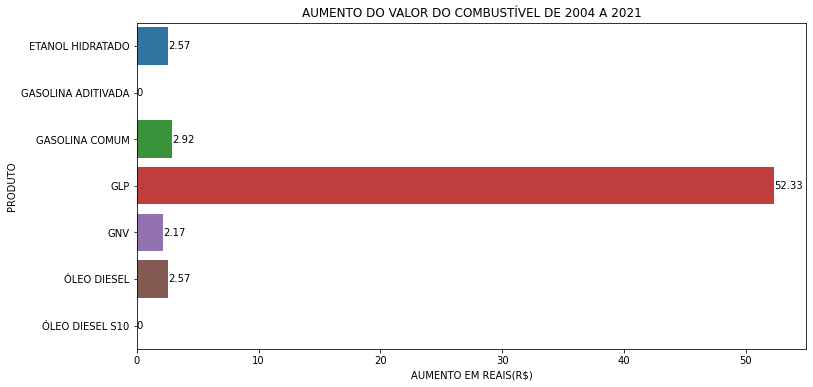

In [81]:
plt.figure(figsize=(12,6))
aumento_bruto_produto['AUMENTO EM REAIS(R$)']=aumento_bruto_produto['PREÇO MÉDIO REVENDA'].astype('float64')
aumento_bruto_produto['AUMENTO EM REAIS(R$)']=aumento_bruto_produto['AUMENTO EM REAIS(R$)'].round(decimals = 2)
aumento_bruto_produto
grafico_aumento_bruto = sns.barplot(data=aumento_bruto_produto, x='AUMENTO EM REAIS(R$)', y='PRODUTO')
grafico_aumento_bruto.bar_label(grafico_aumento_bruto.containers[0])
grafico_aumento_bruto.set_title('AUMENTO DO VALOR DO COMBUSTÍVEL DE 2004 A 2021')


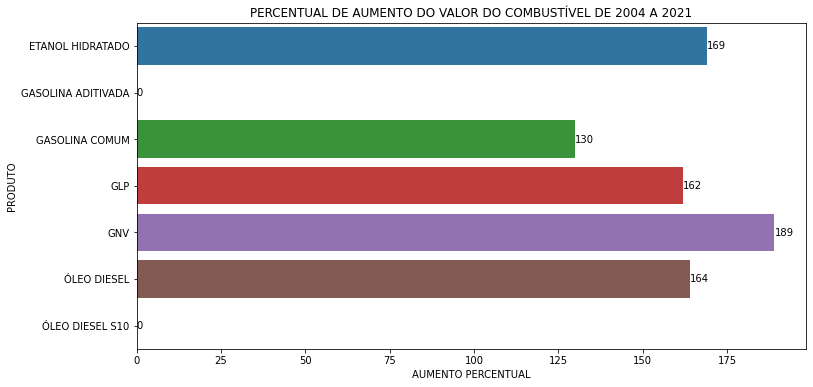

In [ ]:
plt.figure(figsize=(12,6))
aumento_percentual_produto['AUMENTO PERCENTUAL']=aumento_percentual_produto['PREÇO MÉDIO REVENDA'].astype('int64')
grafico_aumento_percentual = sns.barplot(data=aumento_percentual_produto, x='AUMENTO PERCENTUAL', y='PRODUTO')
grafico_aumento_percentual.bar_label(grafico_aumento_percentual.containers[0])
grafico_aumento_percentual.set_title('PERCENTUAL DE AUMENTO DO VALOR DO COMBUSTÍVEL DE 2004 A 2021');

Verificando a existencia de outliers no preço do produto, podemos observar nitidamente a discrepancia no valor do GLP em comparação dos outros.

In [41]:
fig=px.box(data_frame=df_gas, y='PREÇO MÉDIO REVENDA', color='PRODUTO')
fig.update_layout(template='presentation')

Ess discreprancia acontece porque cada combustível é tabelado com unidades de medidas diferentes. Enquanto a gasolina comum, a gasolina aditivada, o óleo dísel e p óleo disel s10 são vendidos por litro, o GNV é vendido por m3 e o GLP é vendido por butijão de 13kg. Por isso, decidimos observer os valores dos outliers por tipo de combustível. Além disso, como o dataframe é divido por semana no decorrer de 17 anos (Maio/2014 a Maio/2021), decidimos separar também por ano para facilitar ainda mais a obsevração da existencia de outliers.

In [59]:
from matplotlib.pyplot import title

df_precos_glp = df_gas.loc[df_gas["PRODUTO"]=='GLP']

fig=px.box(data_frame=df_precos_glp, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title= 'GLP',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')


In [61]:
df_precos_etanol = df_gas.loc[df_gas["PRODUTO"]=='ETANOL HIDRATADO']

fig=px.box(data_frame=df_precos_etanol, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='ETANOL HIDRATADO',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [62]:
df_precos_gasolina_c = df_gas.loc[df_gas["PRODUTO"]=='GASOLINA COMUM']

fig=px.box(data_frame=df_precos_gasolina_c, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='GASOLINA COMUM',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [63]:
df_precos_gasolina_a = df_gas.loc[df_gas["PRODUTO"]=='GASOLINA ADITIVADA']

fig=px.box(data_frame=df_precos_gasolina_a, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='GASOLINA ADITIVADA',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [67]:
df_precos_disel = df_gas.loc[df_gas["PRODUTO"]=='ÓLEO DIESEL']

fig=px.box(data_frame=df_precos_disel, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='ÓLEO DIESEL',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [65]:
df_precos_disel_10 = df_gas.loc[df_gas["PRODUTO"]=='ÓLEO DIESEL S10']

fig=px.box(data_frame=df_precos_disel_10, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='ÓLEO DIESEL S10',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [68]:
df_precos_gnv = df_gas.loc[df_gas["PRODUTO"]=='GNV']

fig=px.box(data_frame=df_precos_gnv, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='GNV',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

Observando cada combustível, pudemos identificar a existencia de alguns outliers, porém considerando que cada valor nos gráficos apresentados representa uma média de uma semana por estado, é natural que tenha alguns valores discrepantes, porém não os consideramos anomalias. Para ter uma análise ainda melhor dos outliers e a necessidade de removê-los ou não, poderíamos ainda fazer um recorte por estado.

Text(0.5, 1.0, 'Diesels10')

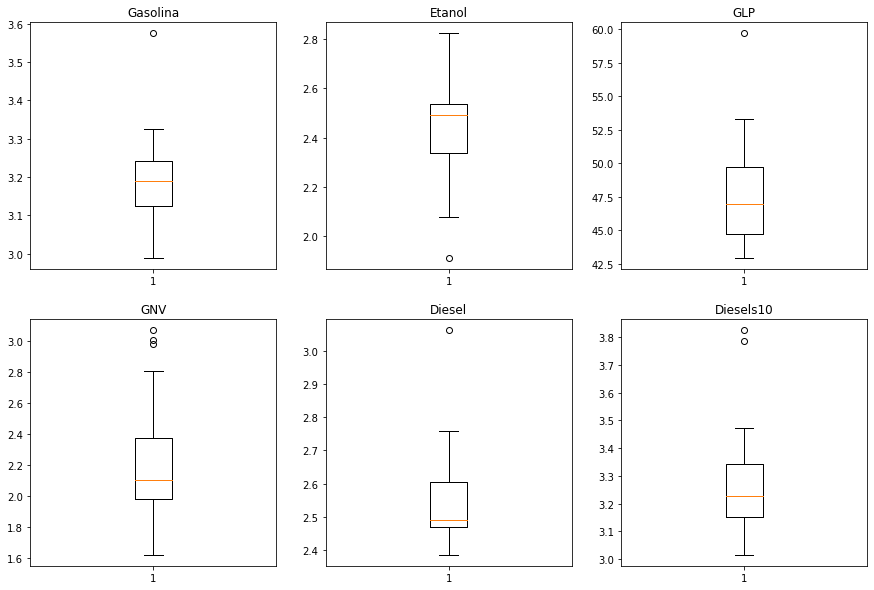

In [ ]:
# valor_produtos_2021= df_gas[df_gas['ANO']==2021].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')

fig2, axs2 = plt.subplots(2, 3, figsize=(15,10))


valor_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_etanol = df_gas[df_gas['PRODUTO']=='ETANOL HIDRATADO'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_glp = df_gas[df_gas['PRODUTO']=='GLP'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_gnv = df_gas[df_gas['PRODUTO']=='GNV'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_diesel = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_diesels10 = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL S10'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')


axs2[0,0].boxplot(valor_gasolina)
axs2[0,1].boxplot(valor_etanol)
axs2[0,2].boxplot(valor_glp)
axs2[1,0].boxplot(valor_gnv)
axs2[1,1].boxplot(valor_diesel)
axs2[1,2].boxplot(valor_diesels10)

axs2[0,0].set_title('Gasolina')
axs2[0,1].set_title('Etanol')
axs2[0,2].set_title('GLP')
axs2[1,0].set_title('GNV')
axs2[1,1].set_title('Diesel')
axs2[1,2].set_title('Diesels10')